<a href="https://colab.research.google.com/github/alirezasdg1/Amazon-recommender-system/blob/master/notebooks/prepare_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocess the datasets

First I downlaod the dataset and prepare them for furthure analyses.


In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
from google.colab import files
import numpy as np

Dataset for the products

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles/meta_Sports_and_Outdoors.json.gz

--2020-09-15 03:08:02--  http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles/meta_Sports_and_Outdoors.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 512767929 (489M) [application/octet-stream]
Saving to: ‘meta_Sports_and_Outdoors.json.gz’

meta_Sports_and_Out 100%[===================>] 489.01M  49.8MB/s    in 10s     

2020-09-15 03:08:12 (47.8 MB/s) - ‘meta_Sports_and_Outdoors.json.gz’ saved [512767929/512767929]



In [ ]:
### load the meta data

data = []
with gzip.open("meta_Sports_and_Outdoors.json.gz") as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

962300
{'category': ['Sports & Outdoors', 'Sports & Fitness', 'Other Sports', 'Dance', 'Clothing'], 'tech1': '', 'description': ['3 layers of super-soft polyester tulle can be cut to length. Satin covered stretch elastic waist gives a one size fits all most.'], 'fit': '', 'title': 'Adult Tutu Assorted Colors (Turquoise)', 'also_buy': [], 'image': [], 'tech2': '', 'brand': 'BubuBibi', 'feature': ['3 Layers - 100% Polyester Tulle, Hand Wash Lay FLat to Dry', '100% Polyester', 'FIT: most Kids. Teens . Adults *Please Check Measurements for Proper Fit', 'WAIST: Satin Covered Elastic 18" relaxed to 36" fully stretched', 'LENGTH: 16" to 17" *can easily be cut to desired length without worry of fraying or unraveling', 'You can return this item for any reason and get a full refund: no shipping charges. The item must be returned in new and unused condition.', '<a id="creturns-policy-url-text-pc" class="a-link-normal" href="/b/ref=frt_dp_sm?ie=UTF8&node=8622296011">\n                        Read 

In [ ]:
# convert list into pandas dataframe

df_products = pd.DataFrame.from_dict(data)

print(len(df_products))

# Product dataframe

In [ ]:
df_products.columns

In [ ]:
df_products.head()

Save to google drive

In [ ]:
df_products.to_csv('df_products.csv')

In [ ]:
files.download("df_products.csv")

In [ ]:
df_products[df_products.astype(str)['image'] != '[]']

## Review data

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Sports_and_Outdoors.json.gz

In [ ]:
data = []
with gzip.open('Sports_and_Outdoors.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

In [ ]:
df_review = pd.DataFrame.from_dict(data)

print(len(df_review))

In [ ]:
del data

In [ ]:
df_review.head()

Save to google drive

In [ ]:
df_review.to_csv('df_review.csv')

In [ ]:
files.download("df_review.csv")

## Reload dataframe from google drive 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_product = pd.read_csv("/content/drive/My Drive/Datasets/df_products.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_product.shape

(962300, 19)

In [3]:
df_review = pd.read_csv("/content/drive/My Drive/Datasets/df_review.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df_review.shape

(12980837, 13)

In [8]:
df_product.head(2)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
0,0,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",NaN,['3 layers of super-soft polyester tulle can b...,NaN,Adult Tutu Assorted Colors (Turquoise),[],[],NaN,BubuBibi,"['3 Layers - 100% Polyester Tulle, Hand Wash L...","712,899 in Clothing, Shoes & Jewelry (","['B071LQWQBQ', 'B00M14DG0O', 'B076GTTY9W', 'B0...","<img src=""https://images-na.ssl-images-amazon....",NaN,"<div class=""a-fixed-left-grid a-spacing-none"">...",$11.80,0000032042,NaN
1,1,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",NaN,['3 layers of super-soft polyester tulle can b...,NaN,Bububibi Adult Ballet Tutu Cheetah Pink,[],[],NaN,BubuBibi,"['3 Layers - 100% Polyester Tulle, Hand Wash L...","712,899 in Clothing, Shoes & Jewelry (",[],"<img src=""https://images-na.ssl-images-amazon....",NaN,"<div class=""a-fixed-left-grid a-spacing-none"">...",$11.97,0000032069,NaN


In [9]:
df_review.head(2)

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,0,5.0,False,"02 1, 2014",A23K73OVXJ04EG,0000031895,Lamb612000,It was as described and fit my 6 year old gran...,Neon Blue Tutu,1391212800,NaN,NaN,NaN
1,1,4.0,True,"11 20, 2013",A2681T699HV6H1,0000031895,Courtney R,very cute and went great with my Halloween cos...,loved it!,1384905600,NaN,NaN,NaN


## Remove products without images and duplicates

In [4]:
df_product_img = df_product[df_product.astype(str)['image'] != '[]'].copy()

In [5]:
df_product_img.shape

(476483, 19)

In [6]:
df_product_img.drop_duplicates(subset=['asin'],inplace=True)

In [7]:
df_product_img.shape

(474978, 19)

In [8]:
df_product_img.head(2)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
6,6,"['Sports & Outdoors', 'Outdoor Recreation', 'C...",NaN,['Deluxe Duffel Bag with full length zipper de...,NaN,6ft of Acid Free Linen Tape for Bookbinding,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Stansport,"['Cotton Canvas', 'Acid Free']","2,077,567 in Sports & Outdoors (","['B003W5YN9Y', 'B077FXJTTS']",Sports & Outdoors,NaN,NaN,$4.00,0000012300,NaN
11,11,"['Sports & Outdoors', 'Sports & Fitness', 'Gol...",NaN,['Create an instant indoors putting green by p...,NaN,Putting Set in Case,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Allegra,[],"5,302,408 in Sports & Outdoors (",[],Sports & Outdoors,NaN,NaN,NaN,0500615594,NaN


In [9]:
df_all = pd.merge(df_product_img,df_review,on='asin')

In [10]:
df_all.shape

(9678890, 31)

In [11]:
df_all.drop_duplicates(inplace=True)

In [12]:
df_all['date'] = pd.to_datetime(df_all['unixReviewTime'],unit='s')

In [13]:
df_all.head(2)

,Unnamed: 0_x,category,tech1,description,fit,title,also_buy,image_x,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details,Unnamed: 0_y,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,vote,style,image_y
0,6,"['Sports & Outdoors', 'Outdoor Recreation', 'C...",NaN,['Deluxe Duffel Bag with full length zipper de...,NaN,6ft of Acid Free Linen Tape for Bookbinding,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Stansport,"['Cotton Canvas', 'Acid Free']","2,077,567 in Sports & Outdoors (","['B003W5YN9Y', 'B077FXJTTS']",Sports & Outdoors,NaN,2017-09-07,$4.00,0000012300,NaN,9411978,4.0,True,"09 7, 2017",A1BUNBDDEO1N4B,Tom,not used yet but looks fine,Four Stars,1504742400,NaN,NaN,NaN
1,11,"['Sports & Outdoors', 'Sports & Fitness', 'Gol...",NaN,['Create an instant indoors putting green by p...,NaN,Putting Set in Case,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Allegra,[],"5,302,408 in Sports & Outdoors (",[],Sports & Outdoors,NaN,2015-06-28,NaN,0500615594,NaN,9411717,2.0,True,"06 28, 2015",A1L1J5K412ZGE3,B,Bent golf stick,DR. BINO,1435449600,NaN,NaN,NaN


In [ ]:
#test = df_all[df_all.reviewText.apply(lambda x: len(str(x))>10)]

## Due to RAM issues, I had to reduce size of my Dataset

In [14]:
df_review_15 = df_all.groupby('reviewerID').agg(Total_review_C=('overall', 'count')).reset_index()

In [15]:
df_review_15[df_review_15.Total_review_C>5]

,reviewerID,Total_review_C
10,A0001528BGUBOEVR6T5U,11
30,A001170867ZBE9FORRQL,10
58,A0024836TBQJ1WBE4VDY,7
66,A0029274J35Q1MYNKUWO,13
80,A0036244LFNO78OM4135,7
...,...,...
5553954,AZZXAAHODW5MC,6
5553992,AZZYI1EW1WY3M,14
5554004,AZZYW4YOE1B6E,7
5554026,AZZZPDCSVJ9X2,7


In [16]:
df_all.shape

(9678890, 31)

In [17]:
df_review_15.shape

(5554037, 2)

In [18]:
df_product_15 = df_all.groupby('asin').agg(Total_review_P=('overall', 'count')).reset_index()

In [19]:
df_product_15.shape

(474970, 2)

In [20]:
df_all_15 = pd.merge(df_all,df_review_15,on='reviewerID', how='left')

In [21]:
df_all_15.head(2)

,Unnamed: 0_x,category,tech1,description,fit,title,also_buy,image_x,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details,Unnamed: 0_y,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,vote,style,image_y,Total_review_C
0,6,"['Sports & Outdoors', 'Outdoor Recreation', 'C...",NaN,['Deluxe Duffel Bag with full length zipper de...,NaN,6ft of Acid Free Linen Tape for Bookbinding,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Stansport,"['Cotton Canvas', 'Acid Free']","2,077,567 in Sports & Outdoors (","['B003W5YN9Y', 'B077FXJTTS']",Sports & Outdoors,NaN,2017-09-07,$4.00,0000012300,NaN,9411978,4.0,True,"09 7, 2017",A1BUNBDDEO1N4B,Tom,not used yet but looks fine,Four Stars,1504742400,NaN,NaN,NaN,1
1,11,"['Sports & Outdoors', 'Sports & Fitness', 'Gol...",NaN,['Create an instant indoors putting green by p...,NaN,Putting Set in Case,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Allegra,[],"5,302,408 in Sports & Outdoors (",[],Sports & Outdoors,NaN,2015-06-28,NaN,0500615594,NaN,9411717,2.0,True,"06 28, 2015",A1L1J5K412ZGE3,B,Bent golf stick,DR. BINO,1435449600,NaN,NaN,NaN,2


In [22]:
df_all_15 = pd.merge(df_all_15,df_product_15,on='asin', how='left')

In [24]:
df_all_15 = df_all_15[(df_all_15['main_cat']=='Sports & Outdoors')]

In [25]:
df_all_15.head()

,Unnamed: 0_x,category,tech1,description,fit,title,also_buy,image_x,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details,Unnamed: 0_y,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,vote,style,image_y,Total_review_C,Total_review_P
0,6,"['Sports & Outdoors', 'Outdoor Recreation', 'C...",NaN,['Deluxe Duffel Bag with full length zipper de...,NaN,6ft of Acid Free Linen Tape for Bookbinding,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Stansport,"['Cotton Canvas', 'Acid Free']","2,077,567 in Sports & Outdoors (","['B003W5YN9Y', 'B077FXJTTS']",Sports & Outdoors,NaN,2017-09-07,$4.00,0000012300,NaN,9411978,4.0,True,"09 7, 2017",A1BUNBDDEO1N4B,Tom,not used yet but looks fine,Four Stars,1504742400,NaN,NaN,NaN,1,1
1,11,"['Sports & Outdoors', 'Sports & Fitness', 'Gol...",NaN,['Create an instant indoors putting green by p...,NaN,Putting Set in Case,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Allegra,[],"5,302,408 in Sports & Outdoors (",[],Sports & Outdoors,NaN,2015-06-28,NaN,0500615594,NaN,9411717,2.0,True,"06 28, 2015",A1L1J5K412ZGE3,B,Bent golf stick,DR. BINO,1435449600,NaN,NaN,NaN,2,1
2,13,"['Sports & Outdoors', 'Sports & Fitness', 'Exe...",NaN,"[""Apollo Challenge is the most effective and s...",NaN,Apollo Challenge : The 28-Day System To Look A...,"['B0713Z5DGM', 'B01KUDOLN8', 'B01DJBCN3I', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,NaN,Apollo Challenge,"['Reduce Belly Fat, Increase Muscle Definition...","288,369 in Sports & Outdoors (",[],Sports & Outdoors,NaN,2016-10-28,$9.97,0692747222,NaN,38,5.0,False,"10 28, 2016",A2LM4ZH4P1OP4O,J Leman,Simple and Powerful! So much non-sense out the...,Simple and easy to follow - it gives actual re...,1477612800,NaN,{'Format:': ' Perfect Paperback'},NaN,1,14
3,13,"['Sports & Outdoors', 'Sports & Fitness', 'Exe...",NaN,"[""Apollo Challenge is the most effective and s...",NaN,Apollo Challenge : The 28-Day System To Look A...,"['B0713Z5DGM', 'B01KUDOLN8', 'B01DJBCN3I', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,NaN,Apollo Challenge,"['Reduce Belly Fat, Increase Muscle Definition...","288,369 in Sports & Outdoors (",[],Sports & Outdoors,NaN,2016-10-27,$9.97,0692747222,NaN,39,5.0,False,"10 27, 2016",A134SACW6ZE6VP,Amazon Customer,This program is incredible. I did this with m...,A Plan that actually work!.... If you actually...,1477526400,3,{'Format:': ' Perfect Paperback'},NaN,1,14
4,13,"['Sports & Outdoors', 'Sports & Fitness', 'Exe...",NaN,"[""Apollo Challenge is the most effective and s...",NaN,Apollo Challenge : The 28-Day System To Look A...,"['B0713Z5DGM', 'B01KUDOLN8', 'B01DJBCN3I', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,NaN,Apollo Challenge,"['Reduce Belly Fat, Increase Muscle Definition...","288,369 in Sports & Outdoors (",[],Sports & Outdoors,NaN,2016-10-27,$9.97,0692747222,NaN,40,5.0,False,"10 27, 2016",A39748BK5G8W5S,Brett,The Apollo Challange is what you've been looki...,The Apollo Challenge just plain works...,1477526400,2,{'Format:': ' Perfect Paperback'},NaN,1,14


In [26]:
df_all_date = df_all_15[(df_all_15['date']> '2010-1-1')]

In [27]:
df_all_date.shape

(7958054, 33)

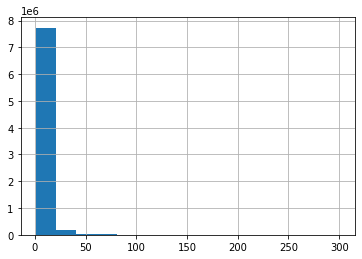

In [30]:
df_all_date.Total_review_C.hist(bins=15)

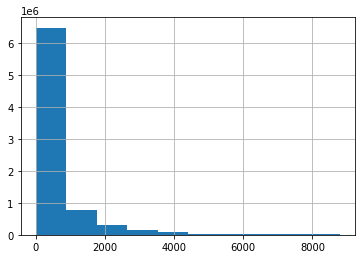

In [31]:
df_all_date.Total_review_P.hist()

In [32]:
print("25% of total number of products")
print(df_all_date.Total_review_P.quantile(q=.75))

print("25% of total number of customers")
print(df_all_date.Total_review_C.quantile(q=.75))

25% of total number of products
628.0
25% of total number of customers
4.0


In [33]:
df_all_re1 = df_all_date[(df_all_date['Total_review_P']>200)]

In [34]:
df_all_re1.shape

(3837656, 33)

In [35]:
df_all_re2 = df_all_re1[(df_all_re1['Total_review_C']>12)]

In [36]:
df_all_re2.shape

(228658, 33)

In [37]:
df_all_re2.head(1)

,Unnamed: 0_x,category,tech1,description,fit,title,also_buy,image_x,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details,Unnamed: 0_y,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,vote,style,image_y,Total_review_C,Total_review_P
772,146,"['Sports & Outdoors', 'Sports & Fitness', 'Exe...",NaN,"[""Black Mountain Products (B.M.P.) resistance ...",NaN,Black Mountain Products Resistance Band Set wi...,"['1612431712', 'B01AVDVHTI', 'B002YQUP7Q', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,NaN,Black Mountain,"['Bands included: Yellow (2-4 lbs.), blue (4-6...",303 in Sports & Outdoors (,[],Sports & Outdoors,"class=""a-bordered a-horizontal-stripes a-spa...",2018-03-18,$17.32,7245456313,{},1405,5.0,True,"03 18, 2018",A1J5VYG8O0YEMB,KellyV_Ark,Works as Advertised!,Works as Advertised!,1521331200,NaN,NaN,NaN,14,6695


In [40]:
df_all_re2.drop(['Unnamed: 0_x','category','tech1','tech2','rank','also_view','main_cat','similar_item',"date","Unnamed: 0_y","reviewerName","unixReviewTime"],axis = 1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
df_all_re2

,description,fit,title,also_buy,image_x,brand,feature,price,asin,details,overall,verified,reviewTime,reviewerID,reviewText,summary,vote,style,image_y,Total_review_C,Total_review_P
772,"[""Black Mountain Products (B.M.P.) resistance ...",NaN,Black Mountain Products Resistance Band Set wi...,"['1612431712', 'B01AVDVHTI', 'B002YQUP7Q', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,Black Mountain,"['Bands included: Yellow (2-4 lbs.), blue (4-6...",$17.32,7245456313,{},5.0,True,"03 18, 2018",A1J5VYG8O0YEMB,Works as Advertised!,Works as Advertised!,NaN,NaN,NaN,14,6695
825,"[""Black Mountain Products (B.M.P.) resistance ...",NaN,Black Mountain Products Resistance Band Set wi...,"['1612431712', 'B01AVDVHTI', 'B002YQUP7Q', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,Black Mountain,"['Bands included: Yellow (2-4 lbs.), blue (4-6...",$17.32,7245456313,{},4.0,True,"02 19, 2018",AYMDRRCOPKTCF,product arrived prompt and as described,Four Stars,NaN,NaN,NaN,22,6695
836,"[""Black Mountain Products (B.M.P.) resistance ...",NaN,Black Mountain Products Resistance Band Set wi...,"['1612431712', 'B01AVDVHTI', 'B002YQUP7Q', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,Black Mountain,"['Bands included: Yellow (2-4 lbs.), blue (4-6...",$17.32,7245456313,{},4.0,True,"02 16, 2018",A3AX86YSUHLELL,Okay. So I have had these resistance bands fo...,Great resistance bands and top quality.,NaN,NaN,NaN,14,6695
916,"[""Black Mountain Products (B.M.P.) resistance ...",NaN,Black Mountain Products Resistance Band Set wi...,"['1612431712', 'B01AVDVHTI', 'B002YQUP7Q', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,Black Mountain,"['Bands included: Yellow (2-4 lbs.), blue (4-6...",$17.32,7245456313,{},5.0,False,"01 12, 2018",A12MJJT1RL2S7K,These bands have been perfect for my Cross fit...,Perfect transportable resistance,NaN,NaN,NaN,13,6695
990,"[""Black Mountain Products (B.M.P.) resistance ...",NaN,Black Mountain Products Resistance Band Set wi...,"['1612431712', 'B01AVDVHTI', 'B002YQUP7Q', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,Black Mountain,"['Bands included: Yellow (2-4 lbs.), blue (4-6...",$17.32,7245456313,{},5.0,True,"11 14, 2017",A33BKACRGR3H38,Great bands for my cross-training. I don't lik...,Awesome,NaN,NaN,NaN,19,6695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9673839,[],NaN,Gas ONE GS-3000 Portable Gas Stove with Carryi...,"['B000JORB2M', 'B001D7FYCI', 'B00JT8ZYCS', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,GasOne,['Comes with Gas One fold-able 10 plate Windsc...,$5.12,B01HHB2HK0,{'\n Product Dimensions: \n ': '13.5 x 1...,5.0,True,"04 1, 2013",A1RL3SGTCTKOVA,I got mine because the price was only $7 at th...,Great stove,NaN,NaN,NaN,13,442
9673850,[],NaN,Gas ONE GS-3000 Portable Gas Stove with Carryi...,"['B000JORB2M', 'B001D7FYCI', 'B00JT8ZYCS', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,GasOne,['Comes with Gas One fold-able 10 plate Windsc...,$5.12,B01HHB2HK0,{'\n Product Dimensions: \n ': '13.5 x 1...,5.0,True,"12 26, 2012",A1AZ1NXGGP6LDX,Sturdy. Use this as an extra burner for partie...,Great for emergencies,NaN,NaN,NaN,20,442
9673852,[],NaN,Gas ONE GS-3000 Portable Gas Stove with Carryi...,"['B000JORB2M', 'B001D7FYCI', 'B00JT8ZYCS', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,GasOne,['Comes with Gas One fold-able 10 plate Windsc...,$5.12,B01HHB2HK0,{'\n Product Dimensions: \n ': '13.5 x 1...,5.0,True,"10 31, 2012",A1S08PNPO3HXA5,This stove actually works much better than I e...,"Good solid heat with cheap fuel, for a very go...",6,NaN,NaN,23,442
9673880,[],NaN,Gas ONE GS-3000 Portable Gas Stove with Carryi...,"['B000JORB2M', 'B001D7FYCI', 'B00JT8ZYCS', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,GasOne,['Comes with Gas One fold-able 10 plate Windsc...,$5.12,B01HHB2HK0,{'\n Product Dimensions: \n ': '13.5 x 1...,5.0,True,"06 16, 2011",A2WVF9ZQ068DN0,Of all the portable cookstoves I

In [42]:
df_item_100 = df_all_re2.groupby('asin').agg(Total_review_P=('overall', 'count')).reset_index()

In [43]:
print(f'number of products: {df_item_100.shape[0]}')

number of products: 7154


In [44]:
df_review_100 = df_all_re2.groupby('reviewerID').agg(Total_review_C=('overall', 'count')).reset_index()

In [45]:
print(f'number of unique reviewers: {df_review_100.shape[0]}')

number of unique reviewers: 29426


In [ ]:
print(f'Density: {df_all_re2.shape[0]/(df_item_100.shape[0]*df_review_100.shape[0]) * 100}')

In [ ]:
df_all.to_csv('/content/drive/My Drive/Datasets/df_all.csv')

In [47]:
df_all_re2.to_csv('/content/drive/My Drive/Datasets/df_all_15.csv')

## Reload dataset to erase the RAM

In [ ]:
df_all_15 = pd.read_csv("/content/drive/My Drive/Datasets/df_all_15.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_all_15.drop(['Unnamed: 0','tech1', 'tech2','Unnamed: 0_x','fit','similar_item','date','details','Unnamed: 0_y','reviewTime','vote','image_y'], axis=1,inplace=True)

In [ ]:
df_all_15.head(2)

,category,description,title,also_buy,image_x,brand,feature,rank,also_view,main_cat,price,asin,overall,verified,reviewerID,reviewerName,reviewText,summary,unixReviewTime,style,Total_review_C,Total_review_P
0,"['Sports & Outdoors', 'Outdoor Recreation', 'C...",['Find your way through New York while hitting...,Delorme New York State Atlas &amp; Gazetteer,"['0899334415', '0899334431', '0899333419', '08...",['https://images-na.ssl-images-amazon.com/imag...,Garmin,"['Amazingly detailed and beautifully crafted, ...","121,074 in Office Products (","['0528881922', '1569145792', '0899334431', '08...",Office Products,$19.95,0899332757,5.0,False,A1LACH6MLQWZ,Doug Erlandson,If you're interested in exploring any area of ...,Great for exploring the rural parts of the state,1470009600,{'Format:': ' Paperback'},23,94
1,"['Sports & Outdoors', 'Outdoor Recreation', 'C...",['Find your way through New York while hitting...,Delorme New York State Atlas &amp; Gazetteer,"['0899334415', '0899334431', '0899333419', '08...",['https://images-na.ssl-images-amazon.com/imag...,Garmin,"['Amazingly detailed and beautifully crafted, ...","121,074 in Office Products (","['0528881922', '1569145792', '0899334431', '08...",Office Products,$19.95,0899332757,4.0,True,A2LBF5LI09BS8Z,JOHN DE BELLAS,"Wonderful, comprehensive atlas. It's a little...",Four Stars,1438646400,{'Format:': ' Paperback'},18,94
